In [ ]:
# Core libraries
import pandas as pd
import numpy as np

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

2. Load Dataset (Colab)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drugsCom_raw (1).xlsx to drugsCom_raw (1).xlsx


In [ ]:
df = pd.read_excel('drugsCom_raw (1).xlsx')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


 3. Filter Required Conditions

In [ ]:
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
df = df[df['condition'].isin(target_conditions)]

In [ ]:
df['condition'].value_counts()

,count
condition,
Depression,9069
"Diabetes, Type 2",2554
High Blood Pressure,2321


4. Data Understanding

In [ ]:
df.shape

(13944, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13944 entries, 11 to 161290
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    13944 non-null  int64         
 1   drugName      13944 non-null  object        
 2   condition     13944 non-null  object        
 3   review        13944 non-null  object        
 4   rating        13944 non-null  int64         
 5   date          13944 non-null  datetime64[ns]
 6   usefulCount   13944 non-null  int64         
 7   clean_review  13944 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 980.4+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0
clean_review,0


5. Filter Required Conditions

In [ ]:
conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
df = df[df['condition'].isin(conditions)]

In [ ]:
df['condition'].value_counts()

,count
condition,
Depression,9069
"Diabetes, Type 2",2554
High Blood Pressure,2321


## Exploratory Data Analysis (EDA)
6. Condition Distribution

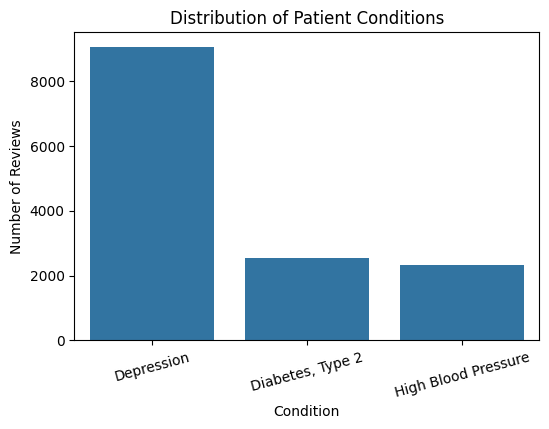

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='condition')
plt.title('Distribution of Patient Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=15)
plt.show()

7. Rating Distribution

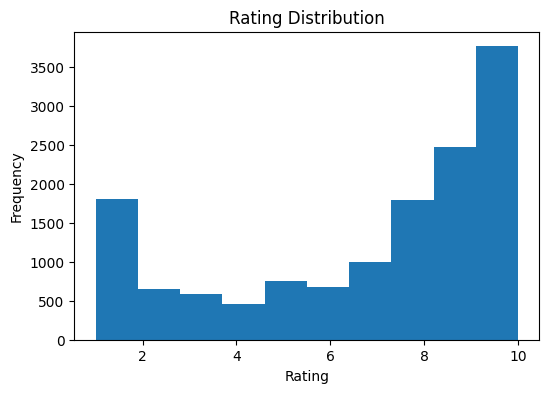

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['rating'], bins=10)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

9. Review Length Analysis

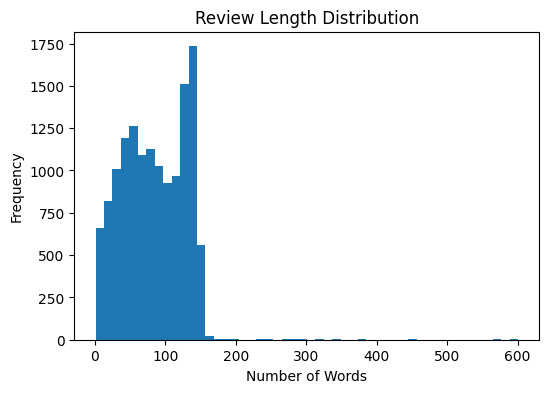

In [ ]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
plt.hist(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

10. Average Rating per Condition

In [ ]:
avg_rating = df.groupby('condition')['rating'].mean().reset_index()


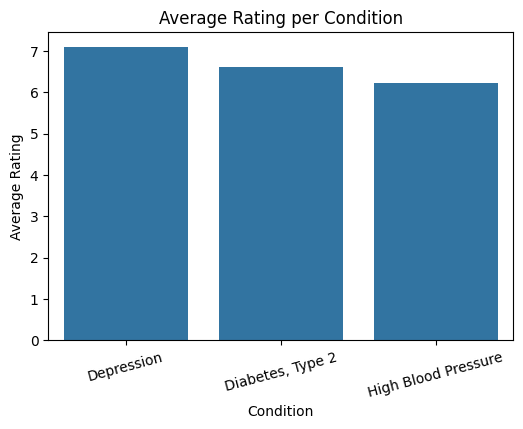

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=avg_rating, x='condition', y='rating')
plt.title('Average Rating per Condition')
plt.xlabel('Condition')
plt.ylabel('Average Rating')
plt.xticks(rotation=15)
plt.show()

11. Useful Count Distribution

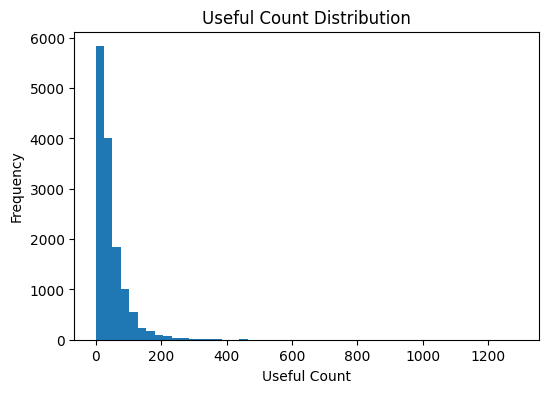

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['usefulCount'], bins=50)
plt.title('Useful Count Distribution')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

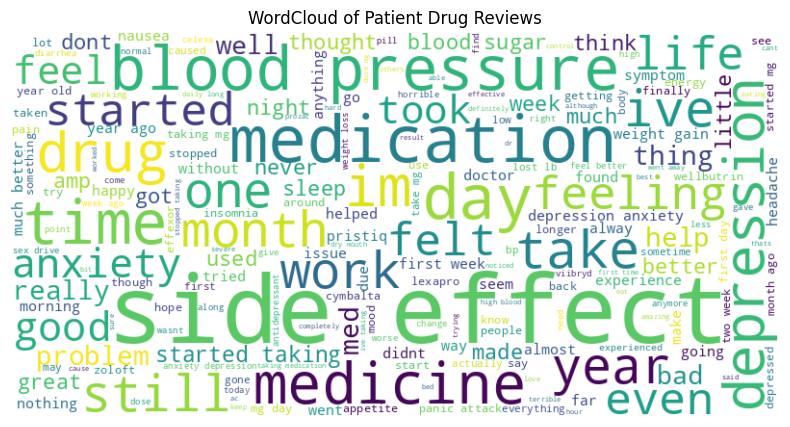

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join all the cleaned reviews into a single string
all_reviews = ' '.join(df['clean_review'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Patient Drug Reviews')
plt.show()

## Text Preprocessing
13. Cleaning the Text

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-z ]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)


In [ ]:
df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()

,review,clean_review
11,"""I have taken anti-depressants for years, with...",taken antidepressant year improvement mostly m...
31,"""1 week on Zoloft for anxiety and mood swings....",week zoloft anxiety mood swing take mg morning...
44,"""my gp started me on Venlafaxine yesterday to ...",gp started venlafaxine yesterday help depressi...
50,"""Hey Guys, It&#039;s been 4 months since my l...",hey guy month since last post wanted give mont...
67,"""This medicine saved my life. I was at my wits...",medicine saved life wit end antidepressant rea...


## Feature Engineering & Model Building
14. Feature and Target Selection

In [ ]:
X = df['clean_review']
y = df['condition']

15. Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

16. TF-IDF Vectorization

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

17. Model Training (Logistic Regression)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation
18. Classification Report

In [ ]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.97      1814
   Diabetes, Type 2       0.97      0.91      0.94       511
High Blood Pressure       0.95      0.83      0.88       464

           accuracy                           0.95      2789
          macro avg       0.95      0.91      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



19. Confusion Matrix

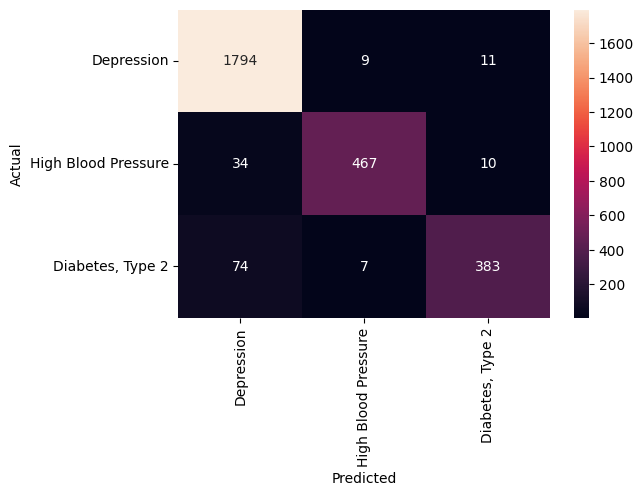

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=conditions,
            yticklabels=conditions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Prediction & Deployment Readiness
20. Predict on New Review

In [ ]:
def predict_condition(review):
    review = clean_text(review)
    vector = tfidf.transform([review])
    return model.predict(vector)[0]

predict_condition("This medicine helped control my sugar levels but caused dizziness")

'Diabetes, Type 2'

21. Save Model Files

In [ ]:
import pickle

pickle.dump(model, open('condition_model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))